<a href="https://colab.research.google.com/github/logansmith9454/cse450/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from google.colab import files

In [153]:
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.dropna()

ro = RandomOverSampler()


campaign['y'] = campaign['y'].map({'no': 0, 'yes': 1})
campaign['not_contacted'] = (campaign['pdays'] == 999).astype(int)
median_pdays = campaign[campaign['pdays'] != 999]['pdays'].median()
campaign['pdays'] = campaign['pdays'].replace(999, median_pdays)

X = campaign.drop(columns=['y', 'pdays', 'emp.var.rate'])

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, drop_first=True)
y = campaign['y']



X_new, y_new = ro.fit_resample(X, y)

new_campaign = pd.DataFrame(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, stratify=y_new, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


# # Predict
# y_pred = clf.predict(X_test)
# y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probs for AUC

# # Metrics (focus on F1/ROC-AUC for imbalance)
# print(classification_report(y_test, y_pred))
# print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}')  # Aim for >0.8

# fig, ax = plt.subplots(figsize=(20, 20))
# tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
# plt.show()

0.9494903392666971


In [157]:
baseline = accuracy_score(y_test, clf.predict(X_test))
print(f"Baseline Accuracy: {baseline:.3f}")

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importances = result.importances_mean

sorted_idx = importances.argsort()[::-1]
print("\nIndividual Feature Importances (Drop in Accuracy):")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.3f} (drop from {baseline:.3f})")

Baseline Accuracy: 0.949

Individual Feature Importances (Drop in Accuracy):
euribor3m: 0.295 (drop from 0.949)
age: 0.245 (drop from 0.949)
nr.employed: 0.215 (drop from 0.949)
cons.price.idx: 0.140 (drop from 0.949)
campaign: 0.132 (drop from 0.949)
cons.conf.idx: 0.086 (drop from 0.949)
housing_yes: 0.071 (drop from 0.949)
contact_telephone: 0.068 (drop from 0.949)
not_contacted: 0.057 (drop from 0.949)
education_university.degree: 0.053 (drop from 0.949)
marital_single: 0.049 (drop from 0.949)
marital_married: 0.042 (drop from 0.949)
day_of_week_mon: 0.040 (drop from 0.949)
default_unknown: 0.036 (drop from 0.949)
day_of_week_thu: 0.035 (drop from 0.949)
loan_yes: 0.035 (drop from 0.949)
poutcome_success: 0.034 (drop from 0.949)
job_technician: 0.034 (drop from 0.949)
day_of_week_wed: 0.033 (drop from 0.949)
job_blue-collar: 0.033 (drop from 0.949)
education_high.school: 0.032 (drop from 0.949)
previous: 0.032 (drop from 0.949)
day_of_week_tue: 0.026 (drop from 0.949)
education_bas

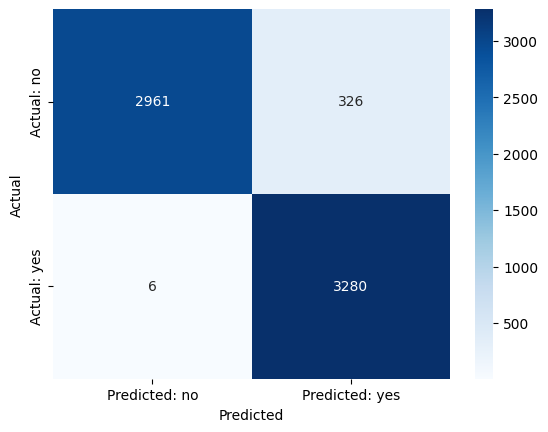

In [155]:
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: no', 'Predicted: yes'], yticklabels=['Actual: no', 'Actual: yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")
holdout.dropna()
holdout['not_contacted'] = (holdout['pdays'] == 999).astype(int)
median_pdays = holdout[holdout['pdays'] != 999]['pdays'].median()
holdout['pdays'] = holdout['pdays'].replace(999, median_pdays)

features = holdout.drop(columns=['pdays', 'emp.var.rate'])

# Apply one-hot encoding to the holdout data
X_holdout = pd.get_dummies(features, drop_first=True)

# Reindex the holdout data to match the training data columns and fill missing values with 0
X_holdout = X_holdout.reindex(columns=trained_columns, fill_value=0)


predictions = clf.predict(X_holdout)
predictions = np.array(predictions).astype(int)
print(predictions)
print(f"predictions: {len(predictions)}")
print(f"holdout: {len(holdout)}")
output_df = pd.DataFrame(predictions, columns=['predictions'])

files.download('team2-module2-predictions.csv')
output_df.to_csv('team2-module2-predictions.csv', index=False)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0]
predictions: 410
holdout: 410


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>